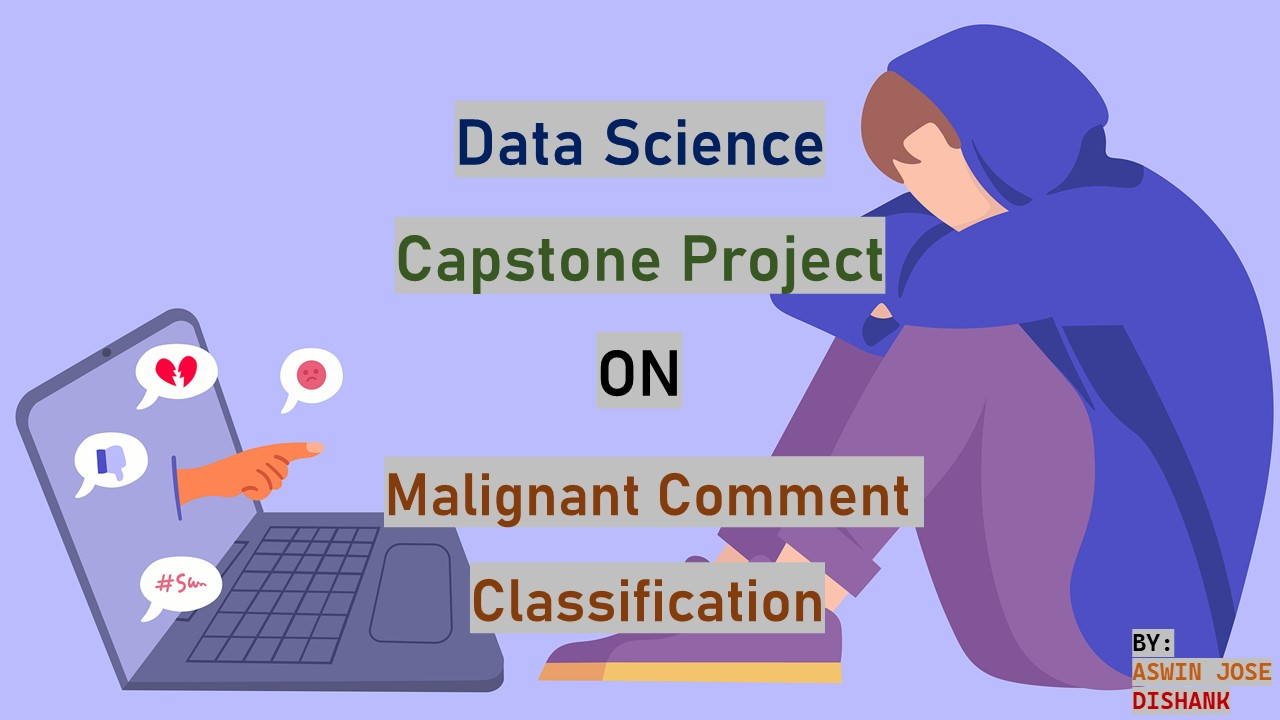

In [1]:
##Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk # Natural language Toolkit
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import  stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [2]:
#Importing train data
train = pd.read_csv(r"F:\ML project 2\Dataset(Train&test)\train.csv")

In [3]:
#Importing test data
test = pd.read_csv(r"F:\ML project 2\Dataset(Train&test)\test.csv")

### Data Understanding

In [4]:
#Visualizing the train dataset 
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
#Visualizing the test dataset 
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
# statistical summary of the dataset 
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# checking null values
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<AxesSubplot:>

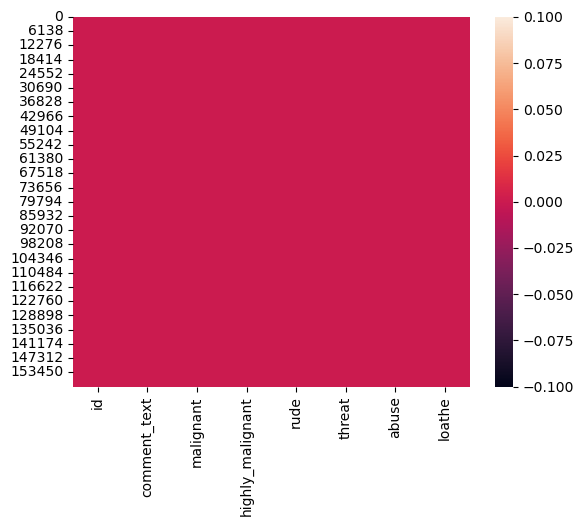

In [9]:
# visualization of null data with seaborne heatmap
sns.heatmap(train.isnull())

In [10]:
# checking correlation in dataset
train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

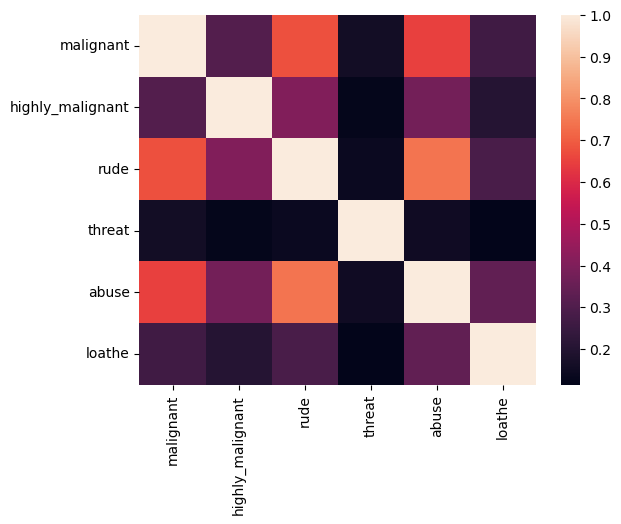

In [11]:
# correlation visualization
sns.heatmap(train.corr())

In [12]:
# checking the skewness for the features:

# skewness = 0 : normally distributed.
# skewness > 0 : more weight in the left tail of the distribution.
# skewness < 0 : more weight in the right tail of the distribution.

train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

`Note:` So, we can conclude our data is skewd leftwards

malignant


0    144277
1     15294
Name: malignant, dtype: int64


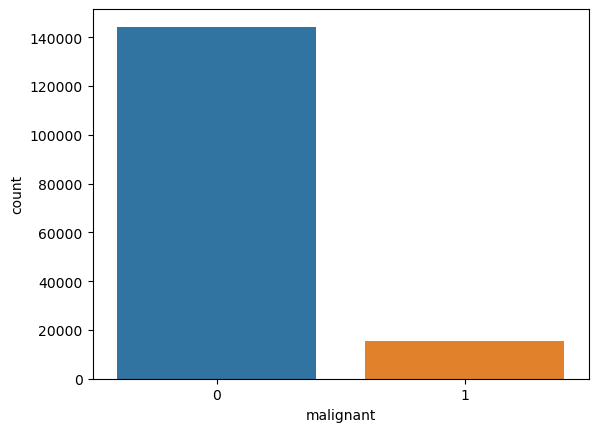

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


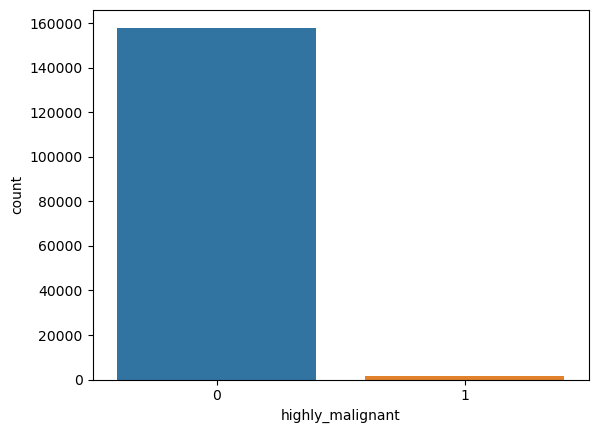

loathe


0    158166
1      1405
Name: loathe, dtype: int64


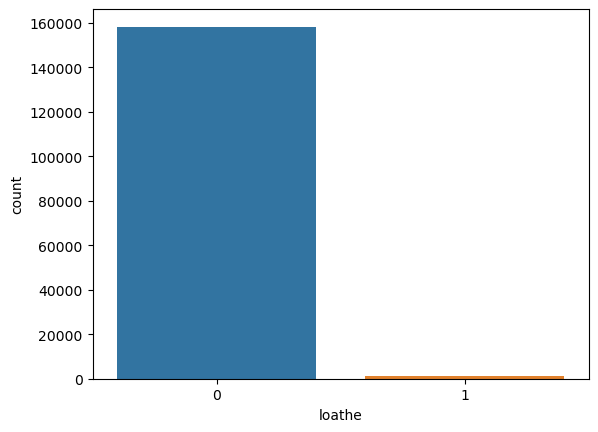

rude


0    151122
1      8449
Name: rude, dtype: int64


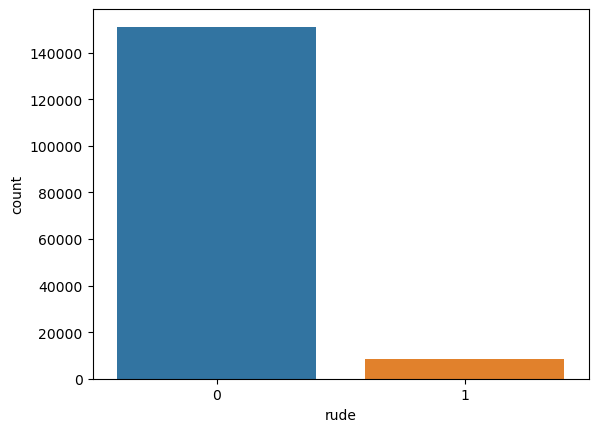

abuse


0    151694
1      7877
Name: abuse, dtype: int64


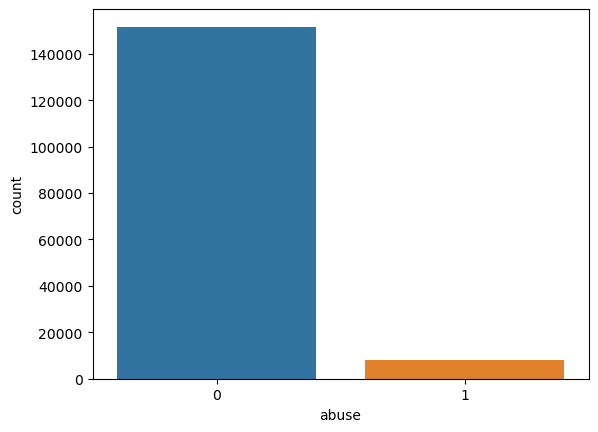

threat


0    159093
1       478
Name: threat, dtype: int64


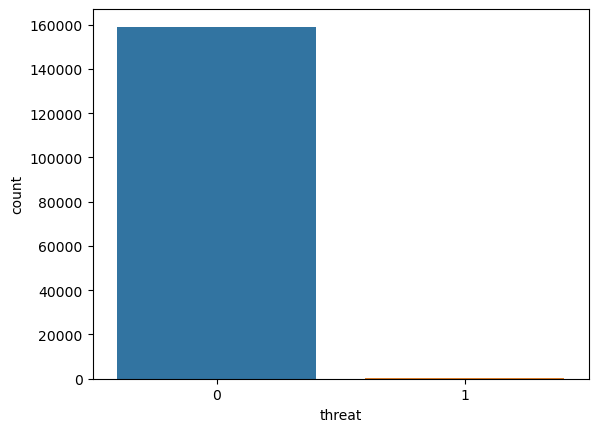

In [13]:
# Visualising columns in dataset with countplot
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(x=train[i])
    plt.show()

### Inference: 
We can clearly observe with countplot that majorly all columns have values of 0 with comparision to 1. Which means that most comments in our dataset have more non malignant comments. 

`0 ->'No'`  `1 -> 'Yes'` 

## Data Cleaning and Analysis

In [14]:
# We will break down the comment text into words and characters to look at the length
train['length'] = train['comment_text'].str.len()
train.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70


`Note:`We shall follow the same step for the test data

In [15]:
test['length'] = test['comment_text'].str.len()
test.head(10)

,id,comment_text,length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
5,0001ea8717f6de06,Thank you for understanding. I think very high...,96
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...,176
7,000247e83dcc1211,:Dear god this site is horrible.,32
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ...",556
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...,224


### Text PreProcessing Steps
1) Conversion of Text to Lower case<br>
2) Word Tokenization<br>
3) Punctuation Removal<br>
4) Removing Digits<br>
4) Removing Stop Words<br>
5) Stemming or Lemmatization<br>
6) Vectorization

### Lower case converstion:
When we have a text input, such as a paragraph we find words both in lower as well as upper case. However, the same words written in different cases are considered as different entities by the computer. <br>

For example:`Girl` and `girl` are considered as two separate words by the computer even though they mean the same.

In order to resolve this issue, we must convert all the words to lower case. This provides uniformity in the text.



### Tokenization:
Tokenization is the process of breaking up the paragraph into smaller units such as sentences or words.Each unit is then considered as an individual token.

### Punctuation removal:
The next step is to remove punctuations as they are no value addition to the model. Removing the punctuations will help in reducing the size of the training set. We will remove the punctuations like commas and full stops from the comments as it doesn’t add any extra information while treating the text data.

### Stop words:
Stop words are a collection of words that occur frequently in any language but do not add much meaning to the sentences. <br>
For example some of the English stop words are “the”, “he”, “him”, “his”, “her”, “herself” etc.

### Stemming:
Stemming is the process of reduction of a word into its root or stem word. The word affixes are removed leaving behind only the root form or lemma.

Example of stemming: 
The words “connecting”, “connect”, “connection”, “connects” are all reduced to the root form `“connect”`. The words “studying”, “studies”, “study” are all reduced to `“studi”`.

As we observed not everytime stemming the words give a meaningfull word like the above word `studi` which is not a proper word. Thats why we use the concept of lemmatization.

### Lemmatization: 
 It looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words, 
 aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.
 
 "Example of lemmatization:"<br>

  meeting    --->   `meet`(core-word extraction)<br> 
  was        --->    `be` (tense conversion to present tense)<br>
  mice       --->   `mouse` (plural to singular)
  
### Vectorisation:
 Vectorization is the process of converting text data to numerical vectors. 
 Later those vectors are used to build various machine learning models.

*******************************************************************************************************************************

### Now we will clean the comment text to fitler out the stopwords and punctuation, email, websites and phone numbers

In [16]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'emailaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' 
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollars')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

# Defining stop words
stop_words = set(stopwords.words('english'))

train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

lem = WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

### Here's a breakdown of the different parts of the regular expression:
#### Email:
The regular expression `r'^.+@[^\.].*\.[a-z]{2,}$'` is a pattern that can be used to match a string that represents a valid email address: <br>

`^` is a special character that indicates the start of a string<br>
 `.+` is a pattern that matches one or more of any character (except for a newline)<br>
 `@` is a literal character that must be matched exactly<br>
 `[^\.].*` is a pattern that matches zero or more of any character (except for a newline), as long as the first character is not 
 a period<br>
 `\.` is a literal period character that must be matched exactly<br>
 `[a-z]{2,}` is a pattern that matches two or more lowercase letters<br>
`$` is a special character that indicates the end of a string

#### Web-address:
The regular expression `r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$'` is a pattern that can be used to <br>
match a string that represents a valid URL starting with `http://.` <br>

`^` is a special character that indicates the start of a string<br>
`http\://` is a literal string that must be matched exactly<br>
`[a-zA-Z0-9\-\.]+` is a pattern that matches one or more of any alphabetic character (uppercase or lowercase), digits, hyphens, or periods<br>
`\.` is a literal period character that must be matched exactly<br>
`[a-zA-Z]{2,3}` is a pattern that matches two or three alphabetic characters (uppercase or lowercase)<br>
`(/\S*)?` is an optional pattern that matches a forward slash followed by zero or more non-whitespace characters<br>
`$` is a special character that indicates the end of a string

#### Phone-number:

The regular expression `r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$'` is a pattern that can be used to match a 
string that represents a valid phone number:

`^` is a special character that indicates the start of a string<br>
`\(?` is an optional pattern that matches an open parenthesis character<br>
`[\d]{3}` is a pattern that matches three digits<br>
`\)?` is an optional pattern that matches a close parenthesis character<br>
`[\s-]?` is an optional pattern that matches either a whitespace character or a hyphen<br>
`[\d]{3}` is a pattern that matches three digits<br>
`[\s-]?` is an optional pattern that matches either a whitespace character or a hyphen<br>
`[\d]{4}` is a pattern that matches four digits<br>
`$` is a special character that indicates the end of a string<br>

Example:<br>
(123) 456-7890<br>
123-456-7890<br>
123 456 7890<br>
1234567890

In [17]:
# Similarly for the test data

# Convert all messages to lower case
test['comment_text'] = test['comment_text'].str.lower()

# Replace email addresses with 'emailaddress'
test['comment_text'] = test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
test['comment_text'] = test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' 
test['comment_text'] = test['comment_text'].str.replace(r'£|\$', 'dollars')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
test['comment_text'] = test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'numbr'
test['comment_text'] = test['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

# Defining stop words
stop_words = set(stopwords.words('english'))

test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

lem = WordNetLemmatizer()
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [18]:
# Now we see the length of the text after filtering out the necessary stopwords and punctuations
train['clean_length'] = train.comment_text.str.len()
train.head()

# For test data 
test['clean_length'] = test.comment_text.str.len()

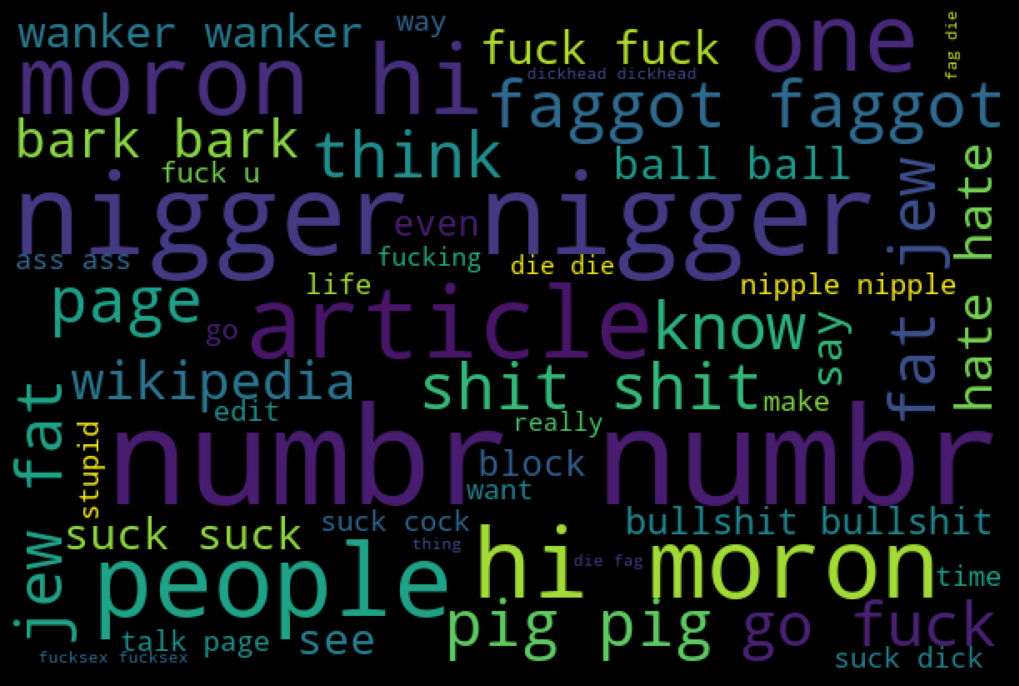

In [19]:
#Getting sense of loud words which are offensive
spam = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(spam))
plt.figure(figsize=(10,8),facecolor='black')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

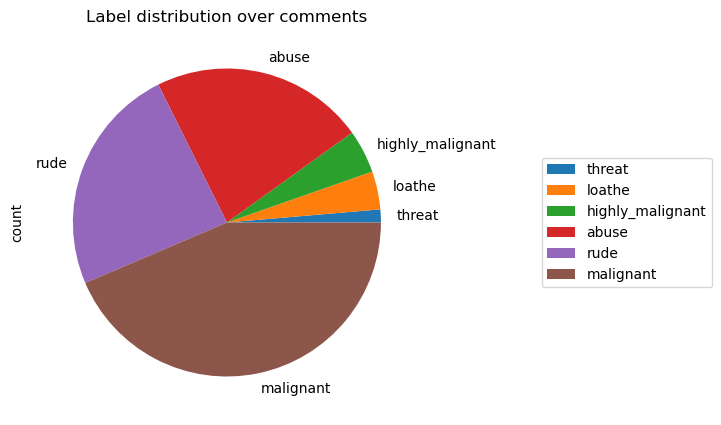

In [20]:
# Pie chart of columns in dataset
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

#### Inference:
We can see that most comments are malignant, followed by rude comments, than abusive comment and so on...

In [21]:
#Creating a combined target column
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


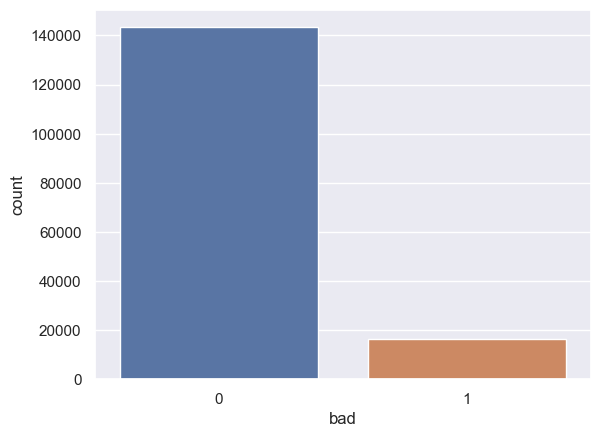

In [22]:
#Checking the imbalance 
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

#### Inference:
We can observe that data has more non-bad comments with comparion to the bad comments

In [23]:
#  Convert text into vectors using TF-IDF:

tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features
y = train['bad']

In [24]:
# Test train split
# Train data is 70% while the test data is 30%

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

### Model development


#### Logistic Regression

In [25]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred_train = lg.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = lg.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9595520103134316
Test accuracy is 0.9554019050802139
[[42726   224]
 [ 1911  3011]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



#### Decision Tree Classifier

In [26]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_train = dt.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = dt.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.998925684204872
Test accuracy is 0.9398813502673797
[[41625  1325]
 [ 1553  3369]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.72      0.68      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



#### Random Forest Classifier

In [27]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = rf.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988988263099938
Test accuracy is 0.9550050133689839
[[42400   550]
 [ 1604  3318]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



#### XGBoost

In [28]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9617364524301919
Test accuracy is 0.9526445521390374
[[42675   275]
 [ 1992  2930]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     42950
           1       0.91      0.60      0.72      4922

    accuracy                           0.95     47872
   macro avg       0.93      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



#### K Neighbors Classifier

In [29]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9289519154155363
Test accuracy is 0.9178434157754011
[[42607   343]
 [ 3590  1332]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     42950
           1       0.80      0.27      0.40      4922

    accuracy                           0.92     47872
   macro avg       0.86      0.63      0.68     47872
weighted avg       0.91      0.92      0.90     47872



#### Best performing models ranking: 
Rank1:- Random Forest classifier<br>
Rank2:- Decision Tree Classifier<br>
Rank3:- XGBoost<br>
Rank4:- Logistic Regression<br>
Rank5:- K Neighbour classifier

#### Inference:
We can observe that 'Random Forest classifier' works best with comparision to other machine learning models

### ROC AUC Plot

AUC measures how well a model is able to distinguish between classes

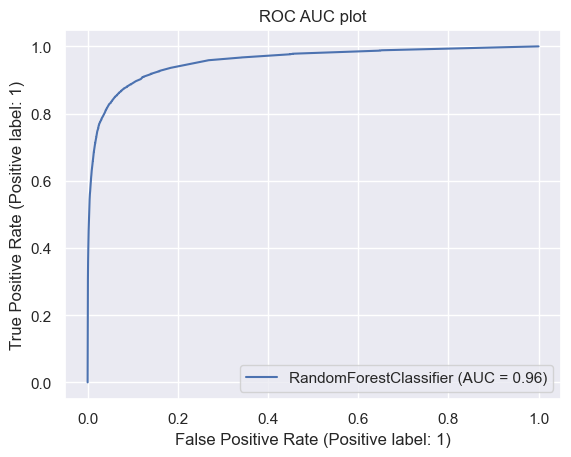

In [30]:
# Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :

plot_roc_curve(rf,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

The AUC score of random forest classifier is 96% which is very good

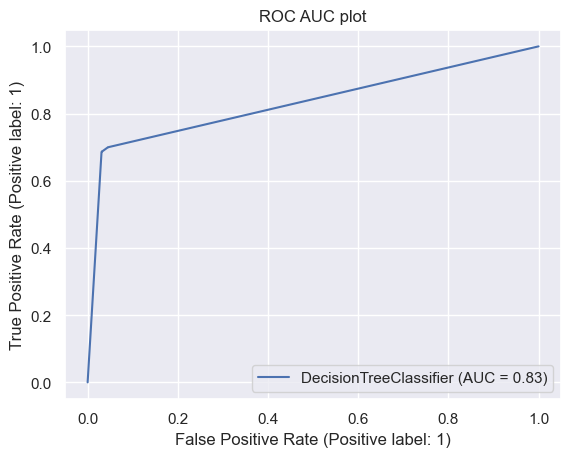

In [31]:
plot_roc_curve(dt,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

The AUC score of decision tree classifier is 83% which is very good

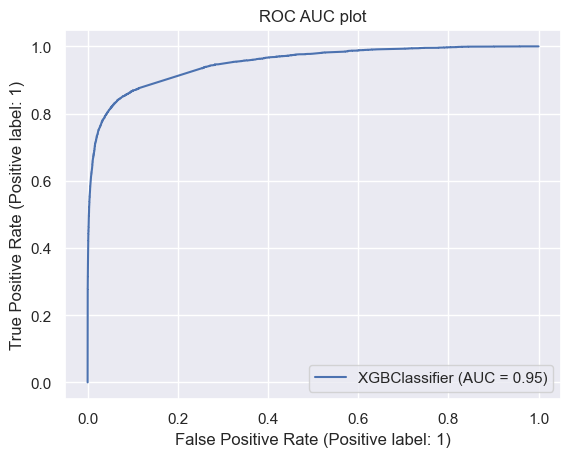

In [32]:
plot_roc_curve(xgb,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

The AUC score of XGBoost is 95% which is very good

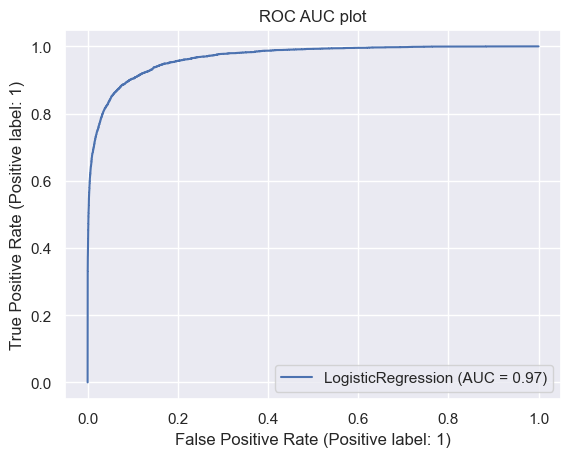

In [33]:
plot_roc_curve(lg,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

The AUC score of Logistic regression is 97% which is very good

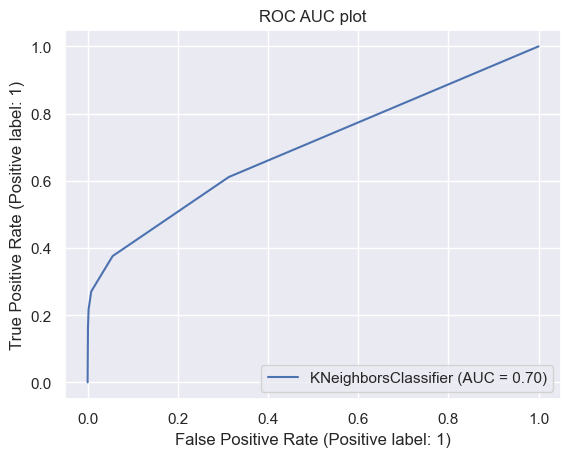

In [34]:
plot_roc_curve(knn,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

The AUC score of KNN is 70% which is very good

### Saving the best model

In [35]:
# Saving the model in pickle format so that further model deployement can be done in future

import joblib
joblib.dump(rf,"malig.pkl")

['malig.pkl']

### Test data Predictions

In [36]:
# Vectorizing the test data

test_data = tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2834932 stored elements in Compressed Sparse Row format>

In [37]:
# Making prediction of the test data

prediction = rf.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
# Creating a csv file for the predicted data

pd.Series(prediction).to_csv('result_malig.csv')

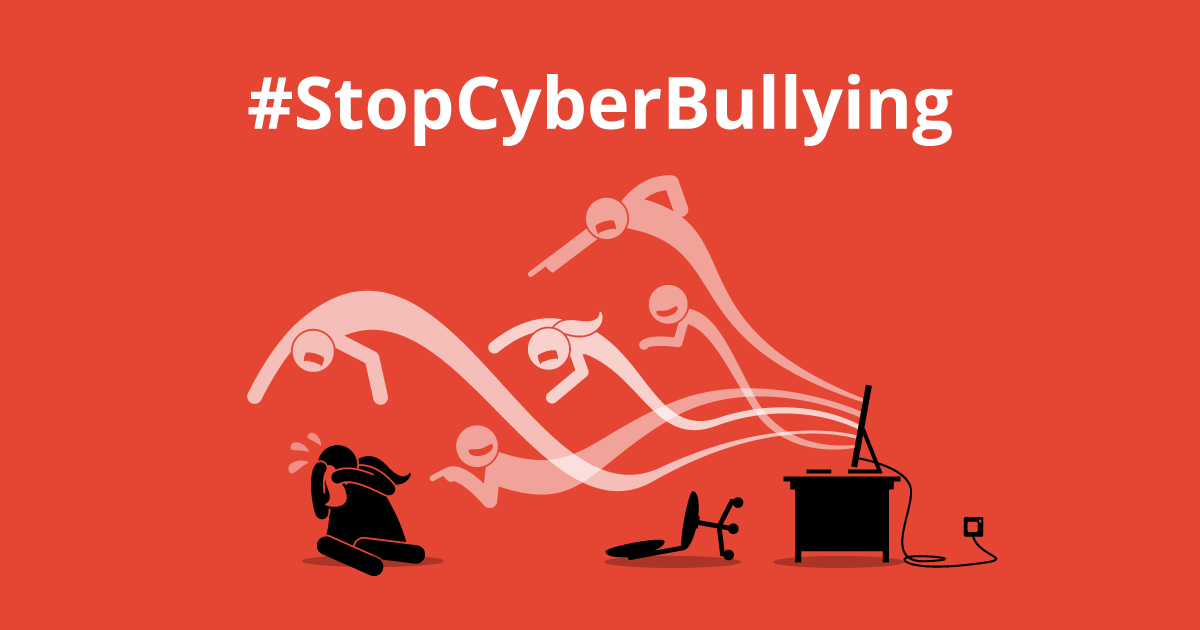